In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
qualityLevels=['Ex','Gd','TA','Fa','Po']
def oneHotFeats(df,header,vals):
    catch = [header]
    for quality in vals:
        newFeat = header +"Is" + str(quality)
        df[newFeat] = 1*(df[header] == quality)
        catch.append(newFeat)
    return catch
def dummie(df,header,vals):
    c = oneHotFeats(df,header,vals)
    df.drop(columns=[header],inplace=True)

In [162]:

df = pd.read_csv("yolo.csv")
df.drop(columns=["Alley"],inplace=True)
df.drop(columns=["MoSold"],inplace=True)
headers = list(df)


dummie(df,"BsmtQual",qualityLevels)
dummie(df,"BsmtCond",qualityLevels)
dummie(df,"BsmtExposure",["Gd","Av","Mn","No"])
dummie(df,"BsmtFinType1",["GLQ","ALQ","BLQ","Rec","LwQ","Unf"])
dummie(df,"BsmtFinType2",["GLQ","ALQ","BLQ","Rec","LwQ","Unf"])
dummie(df,"FireplaceQu",qualityLevels)
dummie(df,"GarageType",["2Types", "Attchd", "Basment", "BuiltIn", "CarPort", "Detchd"])
dummie(df,"GarageFinish",["Fin","RFn","Unf"])
#df["GarageNewness"] = df.GarageYrBlt - 1864 + (2018 - df.YrSold)
#df.GarageNewness.fillna(0,inplace=True)
df.drop(columns=["GarageYrBlt"],inplace=True)
dummie(df,"GarageQual",qualityLevels)
dummie(df,"GarageCond",qualityLevels)
dummie(df,"PoolQC",qualityLevels)
dummie(df,"Fence",["GdPrv", "MnPrv", "GdWo", "MnWw"])


In [163]:
headers=list(df)
whatIsPossible = {}
for header in headers:
    ser = df[header]
    if ser.dtype == "object":
        whatIsPossible[header] = list(ser.unique())
        dummie(df,header,whatIsPossible[header])

whatIsPossible["MSSubClass"]=[20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190]    
dummie(df,"MSSubClass",whatIsPossible["MSSubClass"])


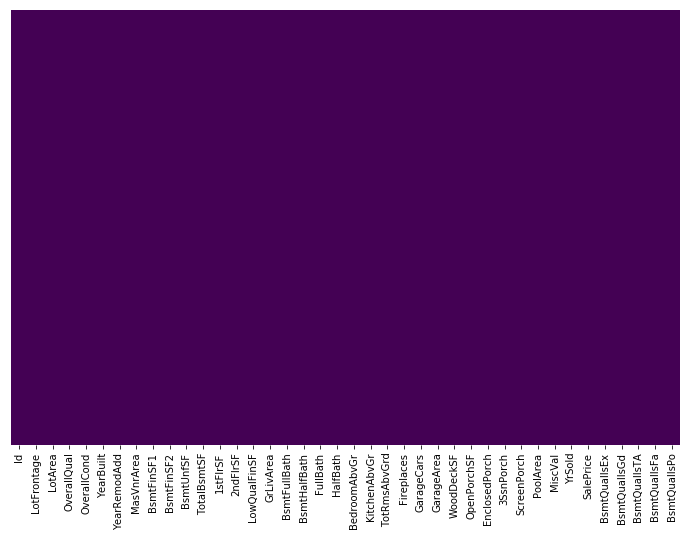

In [164]:
headers = list(df)
plt.figure(figsize=(12,8))
sns.heatmap(df.loc[:,headers[0:40]].isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.show()

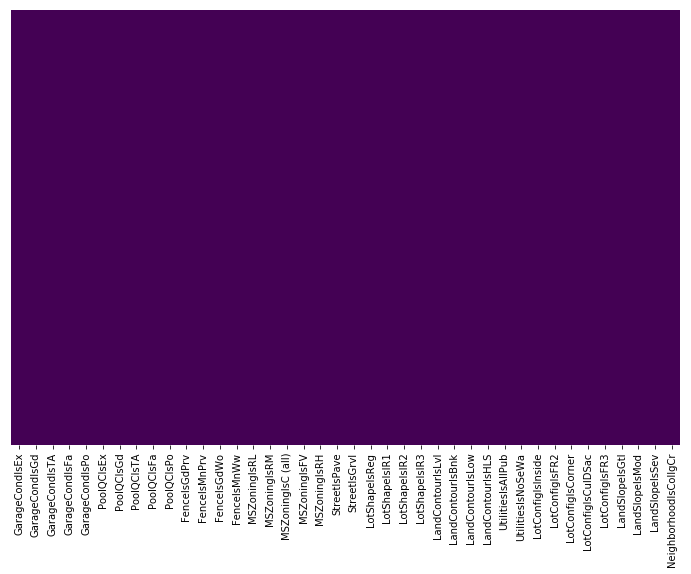

In [165]:
headers = list(df)
plt.figure(figsize=(12,8))
sns.heatmap(df.loc[:,headers[80:120]].isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.show()

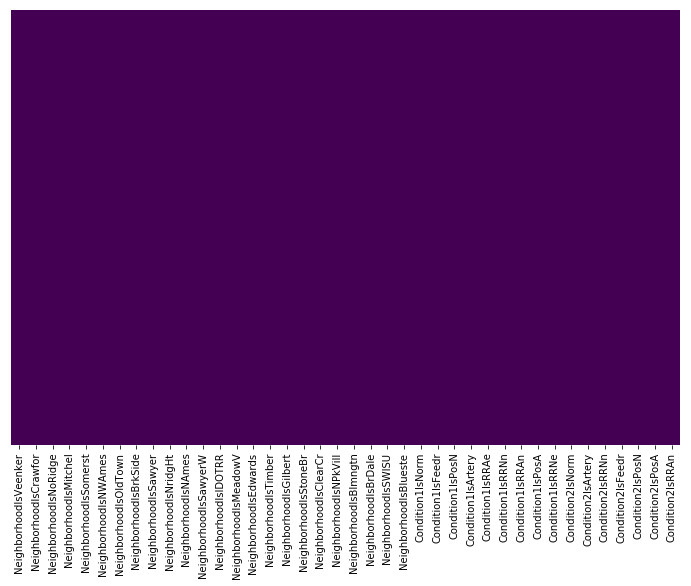

In [166]:
headers = list(df)
plt.figure(figsize=(12,8))
sns.heatmap(df.loc[:,headers[120:160]].isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.show()

In [167]:
headers=list(df)
normalize={}
for header in headers:
    normalize[header]=(0,max(df[header].max(),1))
normalize["YrSold"] = (1864,2010)
del normalize["SalePrice"]
del normalize["Id"]
print(normalize)

{'LotFrontage': (0, 313.0), 'LotArea': (0, 215245), 'OverallQual': (0, 10), 'OverallCond': (0, 9), 'YearBuilt': (0, 2010), 'YearRemodAdd': (0, 2010), 'MasVnrArea': (0, 1600.0), 'BsmtFinSF1': (0, 5644), 'BsmtFinSF2': (0, 1474), 'BsmtUnfSF': (0, 2336), 'TotalBsmtSF': (0, 6110), '1stFlrSF': (0, 4692), '2ndFlrSF': (0, 2065), 'LowQualFinSF': (0, 572), 'GrLivArea': (0, 5642), 'BsmtFullBath': (0, 3), 'BsmtHalfBath': (0, 2), 'FullBath': (0, 3), 'HalfBath': (0, 2), 'BedroomAbvGr': (0, 8), 'KitchenAbvGr': (0, 3), 'TotRmsAbvGrd': (0, 14), 'Fireplaces': (0, 3), 'GarageCars': (0, 4), 'GarageArea': (0, 1418), 'WoodDeckSF': (0, 857), 'OpenPorchSF': (0, 547), 'EnclosedPorch': (0, 552), '3SsnPorch': (0, 508), 'ScreenPorch': (0, 480), 'PoolArea': (0, 738), 'MiscVal': (0, 15500), 'YrSold': (1864, 2010), 'BsmtQualIsEx': (0, 1), 'BsmtQualIsGd': (0, 1), 'BsmtQualIsTA': (0, 1), 'BsmtQualIsFa': (0, 1), 'BsmtQualIsPo': (0, 1), 'BsmtCondIsEx': (0, 1), 'BsmtCondIsGd': (0, 1), 'BsmtCondIsTA': (0, 1), 'BsmtCondIsF

In [168]:
for header in normalize:
    df[header] = (1.0*df[header] - normalize[header][0]) / normalize[header][1]

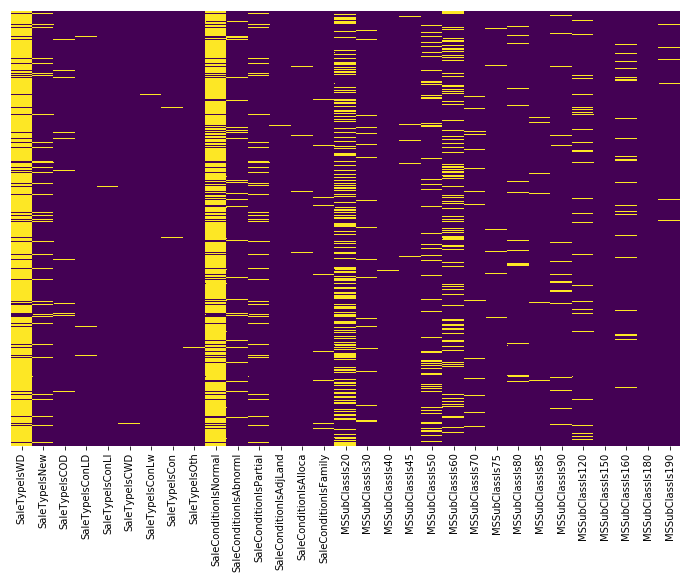

In [182]:
headers = list(df)
df.loc[:,headers[0:10]].describe()
plt.figure(figsize=(12,8))
sns.heatmap(df.loc[:,headers[270:305]],cbar=False,yticklabels=False,cmap='viridis')
plt.show()

In [152]:
df.loc[:,headers[30:40]].describe()

,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,BsmtQualIsEx,BsmtQualIsGd,BsmtQualIsTA,BsmtQualIsFa,BsmtQualIsPo
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,0.0
mean,0.031399,0.003741,0.002808,-0.856274,180930.394791,0.082934,0.422892,0.444825,0.023989,NaN
std,0.116198,0.054459,0.032019,0.000661,79468.964025,0.275876,0.494188,0.497117,0.153067,NaN
min,0.000000,0.000000,0.000000,-0.857178,34900.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,-0.856680,129950.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,-0.856183,163000.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,-0.855685,214000.000000,0.000000,1.000000,1.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,-0.855188,755000.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [184]:
goodOrder=['Id', 'SalePrice', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'BsmtQualIsEx', 'BsmtQualIsGd', 'BsmtQualIsTA', 'BsmtQualIsFa', 'BsmtQualIsPo', 'BsmtCondIsEx', 'BsmtCondIsGd', 'BsmtCondIsTA', 'BsmtCondIsFa', 'BsmtCondIsPo', 'BsmtExposureIsGd', 'BsmtExposureIsAv', 'BsmtExposureIsMn', 'BsmtExposureIsNo', 'BsmtFinType1IsGLQ', 'BsmtFinType1IsALQ', 'BsmtFinType1IsBLQ', 'BsmtFinType1IsRec', 'BsmtFinType1IsLwQ', 'BsmtFinType1IsUnf', 'BsmtFinType2IsGLQ', 'BsmtFinType2IsALQ', 'BsmtFinType2IsBLQ', 'BsmtFinType2IsRec', 'BsmtFinType2IsLwQ', 'BsmtFinType2IsUnf', 'FireplaceQuIsEx', 'FireplaceQuIsGd', 'FireplaceQuIsTA', 'FireplaceQuIsFa', 'FireplaceQuIsPo', 'GarageTypeIs2Types', 'GarageTypeIsAttchd', 'GarageTypeIsBasment', 'GarageTypeIsBuiltIn', 'GarageTypeIsCarPort', 'GarageTypeIsDetchd', 'GarageFinishIsFin', 'GarageFinishIsRFn', 'GarageFinishIsUnf', 'GarageQualIsEx', 'GarageQualIsGd', 'GarageQualIsTA', 'GarageQualIsFa', 'GarageQualIsPo', 'GarageCondIsEx', 'GarageCondIsGd', 'GarageCondIsTA', 'GarageCondIsFa', 'GarageCondIsPo', 'PoolQCIsEx', 'PoolQCIsGd', 'PoolQCIsTA', 'PoolQCIsFa', 'PoolQCIsPo', 'FenceIsGdPrv', 'FenceIsMnPrv', 'FenceIsGdWo', 'FenceIsMnWw', 'MSZoningIsRL', 'MSZoningIsRM', 'MSZoningIsC (all)', 'MSZoningIsFV', 'MSZoningIsRH', 'StreetIsPave', 'StreetIsGrvl', 'LotShapeIsReg', 'LotShapeIsIR1', 'LotShapeIsIR2', 'LotShapeIsIR3', 'LandContourIsLvl', 'LandContourIsBnk', 'LandContourIsLow', 'LandContourIsHLS', 'UtilitiesIsAllPub', 'UtilitiesIsNoSeWa', 'LotConfigIsInside', 'LotConfigIsFR2', 'LotConfigIsCorner', 'LotConfigIsCulDSac', 'LotConfigIsFR3', 'LandSlopeIsGtl', 'LandSlopeIsMod', 'LandSlopeIsSev', 'NeighborhoodIsCollgCr', 'NeighborhoodIsVeenker', 'NeighborhoodIsCrawfor', 'NeighborhoodIsNoRidge', 'NeighborhoodIsMitchel', 'NeighborhoodIsSomerst', 'NeighborhoodIsNWAmes', 'NeighborhoodIsOldTown', 'NeighborhoodIsBrkSide', 'NeighborhoodIsSawyer', 'NeighborhoodIsNridgHt', 'NeighborhoodIsNAmes', 'NeighborhoodIsSawyerW', 'NeighborhoodIsIDOTRR', 'NeighborhoodIsMeadowV', 'NeighborhoodIsEdwards', 'NeighborhoodIsTimber', 'NeighborhoodIsGilbert', 'NeighborhoodIsStoneBr', 'NeighborhoodIsClearCr', 'NeighborhoodIsNPkVill', 'NeighborhoodIsBlmngtn', 'NeighborhoodIsBrDale', 'NeighborhoodIsSWISU', 'NeighborhoodIsBlueste', 'Condition1IsNorm', 'Condition1IsFeedr', 'Condition1IsPosN', 'Condition1IsArtery', 'Condition1IsRRAe', 'Condition1IsRRNn', 'Condition1IsRRAn', 'Condition1IsPosA', 'Condition1IsRRNe', 'Condition2IsNorm', 'Condition2IsArtery', 'Condition2IsRRNn', 'Condition2IsFeedr', 'Condition2IsPosN', 'Condition2IsPosA', 'Condition2IsRRAn', 'Condition2IsRRAe', 'BldgTypeIs1Fam', 'BldgTypeIs2fmCon', 'BldgTypeIsDuplex', 'BldgTypeIsTwnhsE', 'BldgTypeIsTwnhs', 'HouseStyleIs2Story', 'HouseStyleIs1Story', 'HouseStyleIs1.5Fin', 'HouseStyleIs1.5Unf', 'HouseStyleIsSFoyer', 'HouseStyleIsSLvl', 'HouseStyleIs2.5Unf', 'HouseStyleIs2.5Fin', 'RoofStyleIsGable', 'RoofStyleIsHip', 'RoofStyleIsGambrel', 'RoofStyleIsMansard', 'RoofStyleIsFlat', 'RoofStyleIsShed', 'RoofMatlIsCompShg', 'RoofMatlIsWdShngl', 'RoofMatlIsMetal', 'RoofMatlIsWdShake', 'RoofMatlIsMembran', 'RoofMatlIsTar&Grv', 'RoofMatlIsRoll', 'RoofMatlIsClyTile', 'Exterior1stIsVinylSd', 'Exterior1stIsMetalSd', 'Exterior1stIsWd Sdng', 'Exterior1stIsHdBoard', 'Exterior1stIsBrkFace', 'Exterior1stIsWdShing', 'Exterior1stIsCemntBd', 'Exterior1stIsPlywood', 'Exterior1stIsAsbShng', 'Exterior1stIsStucco', 'Exterior1stIsBrkComm', 'Exterior1stIsAsphShn', 'Exterior1stIsStone', 'Exterior1stIsImStucc', 'Exterior1stIsCBlock', 'Exterior2ndIsVinylSd', 'Exterior2ndIsMetalSd', 'Exterior2ndIsWd Shng', 'Exterior2ndIsHdBoard', 'Exterior2ndIsPlywood', 'Exterior2ndIsWd Sdng', 'Exterior2ndIsCmentBd', 'Exterior2ndIsBrkFace', 'Exterior2ndIsStucco', 'Exterior2ndIsAsbShng', 'Exterior2ndIsBrk Cmn', 'Exterior2ndIsImStucc', 'Exterior2ndIsAsphShn', 'Exterior2ndIsStone', 'Exterior2ndIsOther', 'Exterior2ndIsCBlock', 'MasVnrTypeIsBrkFace', 'MasVnrTypeIsNone', 'MasVnrTypeIsStone', 'MasVnrTypeIsBrkCmn', 'ExterQualIsGd', 'ExterQualIsTA', 'ExterQualIsEx', 'ExterQualIsFa', 'ExterCondIsTA', 'ExterCondIsGd', 'ExterCondIsFa', 'ExterCondIsPo', 'ExterCondIsEx', 'FoundationIsPConc', 'FoundationIsCBlock', 'FoundationIsBrkTil', 'FoundationIsWood', 'FoundationIsSlab', 'FoundationIsStone', 'HeatingIsGasA', 'HeatingIsGasW', 'HeatingIsGrav', 'HeatingIsWall', 'HeatingIsOthW', 'HeatingIsFloor', 'HeatingQCIsEx', 'HeatingQCIsGd', 'HeatingQCIsTA', 'HeatingQCIsFa', 'HeatingQCIsPo', 'CentralAirIsY', 'CentralAirIsN', 'ElectricalIsSBrkr', 'ElectricalIsFuseF', 'ElectricalIsFuseA', 'ElectricalIsFuseP', 'ElectricalIsMix', 'KitchenQualIsGd', 'KitchenQualIsTA', 'KitchenQualIsEx', 'KitchenQualIsFa', 'FunctionalIsTyp', 'FunctionalIsMin1', 'FunctionalIsMaj1', 'FunctionalIsMin2', 'FunctionalIsMod', 'FunctionalIsMaj2', 'FunctionalIsSev', 'PavedDriveIsY', 'PavedDriveIsN', 'PavedDriveIsP', 'SaleTypeIsWD', 'SaleTypeIsNew', 'SaleTypeIsCOD', 'SaleTypeIsConLD', 'SaleTypeIsConLI', 'SaleTypeIsCWD', 'SaleTypeIsConLw', 'SaleTypeIsCon', 'SaleTypeIsOth', 'SaleConditionIsNormal', 'SaleConditionIsAbnorml', 'SaleConditionIsPartial', 'SaleConditionIsAdjLand', 'SaleConditionIsAlloca', 'SaleConditionIsFamily', 'MSSubClassIs20', 'MSSubClassIs30', 'MSSubClassIs40', 'MSSubClassIs45', 'MSSubClassIs50', 'MSSubClassIs60', 'MSSubClassIs70', 'MSSubClassIs75', 'MSSubClassIs80', 'MSSubClassIs85', 'MSSubClassIs90', 'MSSubClassIs120', 'MSSubClassIs150', 'MSSubClassIs160', 'MSSubClassIs180', 'MSSubClassIs190']

In [185]:
df.loc[:,goodOrder].to_csv("better.csv",index=False)